In [260]:
import pandas as pd
#Import reader.py function James's created - it reads the CSV and drops unneeded columns
from reader import reader
from pathlib import Path
import numpy as np
import seaborn as sns
%matplotlib inline
import hvplot.pandas
import holoviews as hv
import plotly.express as px
import matplotlib.pyplot as plt
#hv.extension('bokeh')

In [261]:
#Reading the four CSVs
eth_df = reader(file1 = "Resources\ETH_USD.csv", ticker1 = "ETH")
eth_df.head()

,ETH
Date,
2018-01-18,991.01
2018-01-19,979.57
2018-01-20,1178.29
2018-01-21,1022.74
2018-01-22,999.37


In [262]:
vet_df = reader(file1 = "Resources\VET_USD.csv", ticker1 = "VET")
vet_df.head()

,VET
Date,
2018-08-06,0.01342
2018-08-07,0.01294
2018-08-08,0.01087
2018-08-09,0.01155
2018-08-10,0.00958


In [263]:
btc_df = reader(file1 = "Resources\Bitcoin.csv", ticker1 = "BTC")
btc_df.head()

,BTC
Date,
2018-01-01,13444.9
2018-01-02,14754.1
2018-01-03,15156.6
2018-01-04,15180.1
2018-01-05,16954.8


In [264]:
ada_df = reader(file1 = "Resources\Cardano.csv", ticker1 = "ADA")
ada_df.head()

,ADA
Date,
2018-01-01,0.702200
2018-01-02,0.762000
2018-01-03,1.080000
2018-01-04,1.104300
2018-01-05,0.994903


In [265]:
#Calculating daily returns over 12 months
daily_returns = pd.concat([eth_df, vet_df, btc_df, ada_df], axis="columns", join="inner")
daily_returns = daily_returns.tail(365)
daily_returns.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-03-26,138.35,0.003082,6725.1,0.030843
2020-03-27,131.30,0.003000,6373.4,0.028815
2020-03-28,130.89,0.002969,6233.7,0.029747
2020-03-29,124.43,0.002729,5890.4,0.028065
2020-03-30,132.01,0.002934,6391.0,0.029661


In [266]:
#Calculating daily returns over 6 months
daily_returns6 = daily_returns.tail(183)

#Calculating daily returns over 3 months
daily_returns3 = daily_returns.tail(91)
daily_returns3.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-12-27,684.66,0.016549,26261.3,0.154639
2020-12-28,730.41,0.020129,27057.8,0.176428
2020-12-29,731.72,0.021127,27376.0,0.190995
2020-12-30,752.03,0.020254,28868.7,0.184033
2020-12-31,735.81,0.018750,28949.4,0.181381


In [267]:
#Calculating max price over 12 months
eth_max = max(daily_returns['ETH'])
vet_max = max(daily_returns['VET'])
btc_max = max(daily_returns['BTC'])
ada_max = max(daily_returns['ADA'])
print("12 months")
print(eth_max)
print(vet_max)
print(btc_max)
print(ada_max)

#Calculating max price over 6 months
eth_max6 = max(daily_returns6['ETH'])
vet_max6 = max(daily_returns6['VET'])
btc_max6 = max(daily_returns6['BTC'])
ada_max6 = max(daily_returns6['ADA'])
print ("------------")
print ("6 months")
print(eth_max6)
print(vet_max6)
print(btc_max6)
print(ada_max6)

#Calculating max price over 3 months
eth_max3 = max(daily_returns3['ETH'])
vet_max3 = max(daily_returns3['VET'])
btc_max3 = max(daily_returns3['BTC'])
ada_max3 = max(daily_returns3['ADA'])
print ("------------")
print ("3 months")
print(eth_max3)
print(vet_max3)
print(btc_max3)
print(ada_max3)

12 months
1955.16
0.093639
61195.3
1.377406
------------
6 months
1955.16
0.093639
61195.3
1.377406
------------
3 months
1955.16
0.093639
61195.3
1.377406


In [268]:
#Calculating the crypto:BTC ratio over 12 months, 6 months, and 3 months
eth_btc_ratio = btc_max / eth_max
vet_btc_ratio = btc_max / vet_max
ada_btc_ratio = btc_max / ada_max
btc_btc_ratio = btc_max

eth_btc_ratio6 = btc_max6 / eth_max6
vet_btc_ratio6 = btc_max6 / vet_max6
ada_btc_ratio6 = btc_max6 / ada_max6
btc_btc_ratio6 = btc_max6

eth_btc_ratio3 = btc_max3 / eth_max3
vet_btc_ratio3 = btc_max3 / vet_max3
ada_btc_ratio3 = btc_max3 / ada_max3
btc_btc_ratio3 = btc_max3

In [269]:
#Calculating the normalised returns over 12 months, 6 months, and 3 months
eth_normalised_returns = daily_returns['ETH'] * eth_btc_ratio
vet_normalised_returns = daily_returns['VET'] * vet_btc_ratio
ada_normalised_returns = daily_returns['ADA'] * ada_btc_ratio

eth_normalised_returns6 = daily_returns6['ETH'] * eth_btc_ratio6
vet_normalised_returns6 = daily_returns6['VET'] * vet_btc_ratio6
ada_normalised_returns6 = daily_returns6['ADA'] * ada_btc_ratio6

eth_normalised_returns3 = daily_returns3['ETH'] * eth_btc_ratio3
vet_normalised_returns3 = daily_returns3['VET'] * vet_btc_ratio3
ada_normalised_returns3 = daily_returns3['ADA'] * ada_btc_ratio3

In [270]:
#Combining the normalised returns over 12 months, 6 months, and 3 months
normalised_returns = pd.concat([eth_normalised_returns, vet_normalised_returns, daily_returns['BTC'], ada_normalised_returns], axis="columns", join="inner")
normalised_returns = normalised_returns / btc_max
normalised_returns.head()

normalised_returns6 = pd.concat([eth_normalised_returns6, vet_normalised_returns6, daily_returns6['BTC'], ada_normalised_returns6], axis="columns", join="inner")
normalised_returns6 = normalised_returns6 / btc_max6
normalised_returns6.head()

normalised_returns3 = pd.concat([eth_normalised_returns3, vet_normalised_returns3, daily_returns3['BTC'], ada_normalised_returns3], axis="columns", join="inner")
normalised_returns3 = normalised_returns3 / btc_max3
normalised_returns3.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-12-27,0.350181,0.176732,0.429139,0.112268
2020-12-28,0.373581,0.214964,0.442155,0.128087
2020-12-29,0.374251,0.225622,0.447355,0.138663
2020-12-30,0.384639,0.216299,0.471747,0.133608
2020-12-31,0.376343,0.200237,0.473066,0.131683


In [271]:
# Plot daily returns of all portfolios
normalised_returns.hvplot(figsize = (20,10), title = 'Daily returns for all portfolios over 12 months')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [272]:
normalised_returns6.hvplot(figsize = (20,10), title = 'Daily returns for all portfolios over 6 months')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [273]:
normalised_returns3.hvplot(figsize = (20,10), title = 'Daily returns for all portfolios over 3 months')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [274]:
#Calculating percentage change for 12, 6, 3 months
pct_returns = daily_returns.pct_change()
pct_returns6 = daily_returns6.pct_change()
pct_returns3 = daily_returns3.pct_change()
pct_returns.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-03-26,NaN,NaN,NaN,NaN
2020-03-27,-0.050958,-0.026606,-0.052297,-0.065752
2020-03-28,-0.003123,-0.010333,-0.021919,0.032344
2020-03-29,-0.049354,-0.080835,-0.055072,-0.056544
2020-03-30,0.060918,0.075119,0.084986,0.056868


In [275]:
# Drop nulls for 12, 6, 3 month percentage change
pct_returns.dropna(inplace=True)
pct_returns.isnull()
pct_returns.isnull().sum()
pct_returns.head()

pct_returns6.dropna(inplace=True)
pct_returns6.isnull()
pct_returns6.isnull().sum()
pct_returns6.head()

pct_returns3.dropna(inplace=True)
pct_returns3.isnull()
pct_returns3.isnull().sum()
pct_returns3.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-12-28,0.066821,0.216327,0.030330,0.140902
2020-12-29,0.001794,0.049580,0.011760,0.082566
2020-12-30,0.027757,-0.041322,0.054526,-0.036451
2020-12-31,-0.021568,-0.074257,0.002795,-0.014410
2021-01-01,-0.009051,0.015947,0.014180,-0.034910


In [276]:
# Calculate cumulative returns of all portfolios over 12, 6 & 3 months
cumulative_returns = (1 + pct_returns).cumprod() - 1
cumulative_returns.head()

cumulative_returns6 = (1 + pct_returns6).cumprod() - 1
cumulative_returns6.head()

cumulative_returns3 = (1 + pct_returns3).cumprod() - 1
cumulative_returns3.head()

,ETH,VET,BTC,ADA
Date,,,,
2020-12-28,0.066821,0.216327,0.030330,0.140902
2020-12-29,0.068735,0.276633,0.042446,0.235102
2020-12-30,0.098399,0.223881,0.099287,0.190081
2020-12-31,0.074709,0.132999,0.102360,0.172932
2021-01-01,0.064981,0.151067,0.117991,0.131985


In [277]:
#Cumulative returns over 12 months
cumulative_returns.hvplot(figsize = (20,10), title = 'Cumulative returns for all crypto over 12 months')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [278]:
#Cumulative returns over 6 months
cumulative_returns6.hvplot(figsize = (20,10), title = 'Cumulative returns for all crypto over 6 month')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [279]:
#Cumulative returns over 3 months
cumulative_returns3.hvplot(figsize = (20,10), title = 'Cumulative returns for all crypto over 3 month')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [280]:
#Think we should delete this.
# Box plot to visually show risk
#normalised_returns.plot.box(figsize = (20,10), title = 'Box plot')

In [281]:
# Calculate the daily standard deviations of all portfolios
daily_std = normalised_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

ETH    0.278254
ADA    0.254582
BTC    0.252439
VET    0.205469
dtype: float64

In [282]:
# Calculate the annualized standard deviation (365 trading days)
annualized_std = daily_std * np.sqrt(365)
annualized_std.sort_values(ascending=False)
annualized_std

ETH    5.316041
ADA    4.863773
BTC    4.822832
VET    3.925478
dtype: float64

In [283]:
#Rolling Statistics
#Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for the cryptos using a 21-day window
#Calculate the correlation between each crypto to see which may mimick BTC
#Calculate and plot a 60-day Beta for ETH compared to the BTC

In [284]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
normalised_returns.rolling(window=21).std()
# Plot the rolling standard deviation
normalised_returns.rolling(window=21).std().hvplot(figsize = (20,10), title = 'Rolling 21 day standard deviation, moving average of all portfolios over 12 months')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [285]:
###Briar to use holoview to get this heatmap, then have to use a tab to use to create panels.
#Kevin please do this :-)
###Something like Week 6 homework

# Calculate the correlation
price_correlation = daily_returns.corr()
price_correlation
# Display de correlation matrix
#sns.heatmap(price_correlation, vmin=-1, vmax=1)
#Is this heatmap right?
#hv.HeatMap(price_correlation, label = "Heatmap of correlation of the cryptos over the past 12 months")
#price_correlation.hvplot.heatmap(x='ETH', y='VET', height=500, width=500, colorbar=False)

,ETH,VET,BTC,ADA
ETH,1.000000,0.887143,0.982825,0.912069
VET,0.887143,1.000000,0.913371,0.931107
BTC,0.982825,0.913371,1.000000,0.936866
ADA,0.912069,0.931107,0.936866,1.000000


In [286]:
#This is the correlation over 1 year as it takes our CSV data.
#If we can move move it from date range eg. 5 days
#that would give a short term trend.
price_correlation = daily_returns.corr()
price_correlation
#Lowest correlation is 0.887143 between VET & ETH
#Highest correlation is 0.982825 between BTC & ETHv

,ETH,VET,BTC,ADA
ETH,1.000000,0.887143,0.982825,0.912069
VET,0.887143,1.000000,0.913371,0.931107
BTC,0.982825,0.913371,1.000000,0.936866
ADA,0.912069,0.931107,0.936866,1.000000


In [287]:
#range = daily_returns.date_range(start='2021-03-20', periods=10)

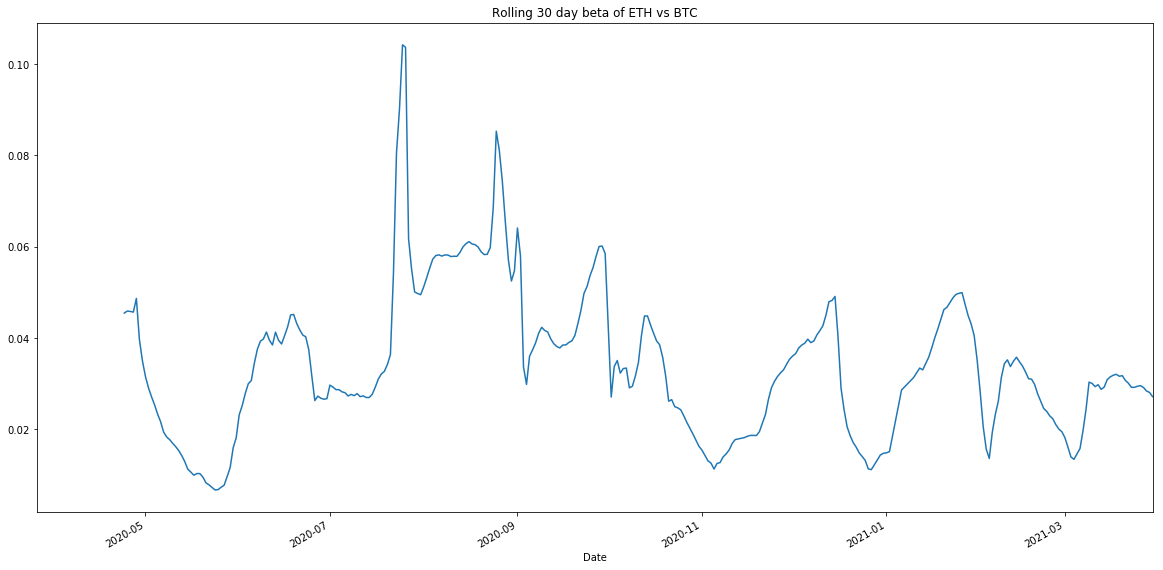

In [288]:
#Calculate and Plot Beta for a token and the BTC
# Calculate covariance of a single portfolio ETH
covariance = daily_returns['ETH'].cov(daily_returns['BTC'])
# Calculate variance of ETH
variance = daily_returns['ETH'].var()
# Computing beta
ETH_beta = covariance/variance
# Plot beta trend
rolling_covariance = daily_returns['ETH'].rolling(window=30).cov(daily_returns['BTC'])
rolling_variance = daily_returns['BTC'].rolling(window=30).var()
rolling_ETH_beta = rolling_covariance / rolling_variance
rolling_ETH_beta.plot(figsize = (20,10), title = 'Rolling 30 day beta of ETH vs BTC')

In [289]:
#An alternative way to calculate a rolling window is to take the exponentially weighted moving average.
#This is like a moving window average, but it assigns greater importance to more recent observations.
#Try calculating the ewm with a 21-day half-life.
ewm_pd = pd.DataFrame(normalised_returns).ewm(span=21).mean()
ewm_pd.hvplot(figsize = (20,10), title = 'Portfolio 21 day EMA')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [290]:
#Sharpe Ratios
#In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone.
#After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
#Using 365 trading days instead of 252 trading days.

# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 365) / (daily_returns.std() * np.sqrt(365))
sharpe_ratios

ETH    21.969220
VET    19.965867
BTC    24.448845
ADA    14.271984
dtype: float64

In [291]:
daily_returns.mean()

ETH      625.593699
VET        0.020107
BTC    19769.044932
ADA        0.261955
dtype: float64

In [292]:
daily_returns.std()

ETH      544.031647
VET        0.019240
BTC    15448.053622
ADA        0.350662
dtype: float64

In [293]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.hvplot(figsize = (20,10), kind="bar", title="Sharpe Ratios")

#Can talk about how Sharpe ratios might not apply to Crypto as the daily returns have been insanely high.

:Bars   [index]   (0)

In [294]:
#Do we need this piece of code?
#Shifting rows by 3 days
#eth_shift = daily_returns["ETH"].shift(periods=3, axis="rows").dropna()
#btc_unshift = daily_returns["BTC"]
#btc_unshift.head()

In [295]:
#Calculating the correlation between different cryptos.
days = [ -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for x in days:
    eth_shift = daily_returns["ETH"].shift(periods=x).dropna()
    if x >= 0:
        btc_unshifted = daily_returns["BTC"][x:]
    else:
        btc_unshifted = daily_returns["BTC"][:x]
    corr_table = pd.concat([eth_shift, btc_unshifted], axis="columns", join="inner")
    print(f"Correlation for period shift of {x} days")
    print(corr_table.corr())
    
#Is there a way to read or slice the data to get the maximum correlation?

Correlation for period shift of -14 days
          ETH       BTC
ETH  1.000000  0.949916
BTC  0.949916  1.000000
Correlation for period shift of -13 days
          ETH       BTC
ETH  1.000000  0.950439
BTC  0.950439  1.000000
Correlation for period shift of -12 days
         ETH      BTC
ETH  1.00000  0.95198
BTC  0.95198  1.00000
Correlation for period shift of -11 days
          ETH       BTC
ETH  1.000000  0.953843
BTC  0.953843  1.000000
Correlation for period shift of -10 days
         ETH      BTC
ETH  1.00000  0.95691
BTC  0.95691  1.00000
Correlation for period shift of -9 days
          ETH       BTC
ETH  1.000000  0.958332
BTC  0.958332  1.000000
Correlation for period shift of -8 days
          ETH       BTC
ETH  1.000000  0.960409
BTC  0.960409  1.000000
Correlation for period shift of -7 days
          ETH       BTC
ETH  1.000000  0.962718
BTC  0.962718  1.000000
Correlation for period shift of -6 days
          ETH       BTC
ETH  1.000000  0.965825
BTC  0.965825  1.000000

In [296]:
#Using this API to return crypto data in JSON format, then obtaining the market cap.
#See the following website for more info. https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyQuotesLatest

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {'symbol':'BTC'}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'de32a3b2-bf2e-4056-86ed-c8df29833cd6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2021-04-11T06:10:45.249Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None}, 'data': {'BTC': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9529, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'arrington-xrp-capital', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures', 'galaxy-digital-portfolio', 'huobi-capital', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-xzy-screener']

In [297]:
#Getting BTC market cap
BTC_MC = data["data"]["BTC"]["quote"]["USD"]["market_cap"]
BTC_MC

1114218802303.9011

In [298]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {'symbol':'ETH'}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'de32a3b2-bf2e-4056-86ed-c8df29833cd6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as f:
  print(f)

{'status': {'timestamp': '2021-04-11T06:10:45.803Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None}, 'data': {'ETH': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'slug': 'ethereum', 'num_market_pairs': 6198, 'date_added': '2015-08-07T00:00:00.000Z', 'tags': ['mineable', 'pow', 'smart-contracts', 'ethereum', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'arrington-xrp-capital', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures', 'hashkey-capital-portfolio', 'kinetic-capital', 'huobi-capital', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-xzy-s

In [299]:
#Getting ETH market cap
ETH_MC = data["data"]["ETH"]["quote"]["USD"]["market_cap"]
ETH_MC

245053655785.34952

In [300]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {'symbol':'ADA'}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'de32a3b2-bf2e-4056-86ed-c8df29833cd6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as g:
  print(g)

{'status': {'timestamp': '2021-04-11T06:10:48.042Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None}, 'data': {'ADA': {'id': 2010, 'name': 'Cardano', 'symbol': 'ADA', 'slug': 'cardano', 'num_market_pairs': 258, 'date_added': '2017-10-01T00:00:00.000Z', 'tags': ['mineable', 'dpos', 'pos', 'platform', 'research', 'smart-contracts', 'staking', 'binance-chain'], 'max_supply': 45000000000, 'circulating_supply': 31948309440.7478, 'total_supply': 45000000000, 'is_active': 1, 'platform': None, 'cmc_rank': 6, 'is_fiat': 0, 'last_updated': '2021-04-11T06:09:15.000Z', 'quote': {'USD': {'price': 1.21233269977306, 'volume_24h': 2386750521.498969, 'percent_change_1h': -0.49213215, 'percent_change_24h': -1.84164758, 'percent_change_7d': 1.8487967, 'percent_change_30d': 9.11674718, 'percent_change_60d': 59.04300054, 'percent_change_90d': 332.77475808, 'market_cap': 38731980237.486916, 'last_updated': '2021-04-11T06:09:15.000Z'}}}}}


In [301]:
#Getting ADA market cap
ADA_MC = data["data"]["ADA"]["quote"]["USD"]["market_cap"]
ADA_MC

38731980237.486916

In [302]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {'symbol':'VET'}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'de32a3b2-bf2e-4056-86ed-c8df29833cd6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as g:
  print(g)

{'status': {'timestamp': '2021-04-11T06:10:49.413Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None}, 'data': {'VET': {'id': 3077, 'name': 'VeChain', 'symbol': 'VET', 'slug': 'vechain', 'num_market_pairs': 122, 'date_added': '2017-08-22T00:00:00.000Z', 'tags': ['logistics', 'data-provenance', 'iot', 'smart-contracts', 'fenbushi-capital-portfolio'], 'max_supply': 86712634466, 'circulating_supply': 64315576989, 'total_supply': 86712634466, 'is_active': 1, 'platform': None, 'cmc_rank': 17, 'is_fiat': 0, 'last_updated': '2021-04-11T06:10:02.000Z', 'quote': {'USD': {'price': 0.13421452196559, 'volume_24h': 2181071211.8498893, 'percent_change_1h': -0.69408299, 'percent_change_24h': 1.83337125, 'percent_change_7d': 46.14926321, 'percent_change_30d': 94.30326805, 'percent_change_60d': 272.13974081, 'percent_change_90d': 447.08949653, 'market_cap': 8632084420.519735, 'last_updated': '2021-04-11T06:10:02.000Z'}}}}}


In [303]:
#Getting VET market cap
VET_MC = data["data"]["VET"]["quote"]["USD"]["market_cap"]
VET_MC

8632084420.519735

In [327]:
#Combining the Market Caps into a dataframe
import pandas as pd

crypto_mc = pd.DataFrame({"Crypto":["BTC", "ETH", "ADA", "VET"], "Market Capitalisation":[BTC_MC, ETH_MC, ADA_MC, VET_MC]})
crypto_mc

,Crypto,Market Capitalisation
0,BTC,1.114219e+12
1,ETH,2.450537e+11
2,ADA,3.873198e+10
3,VET,8.632084e+09


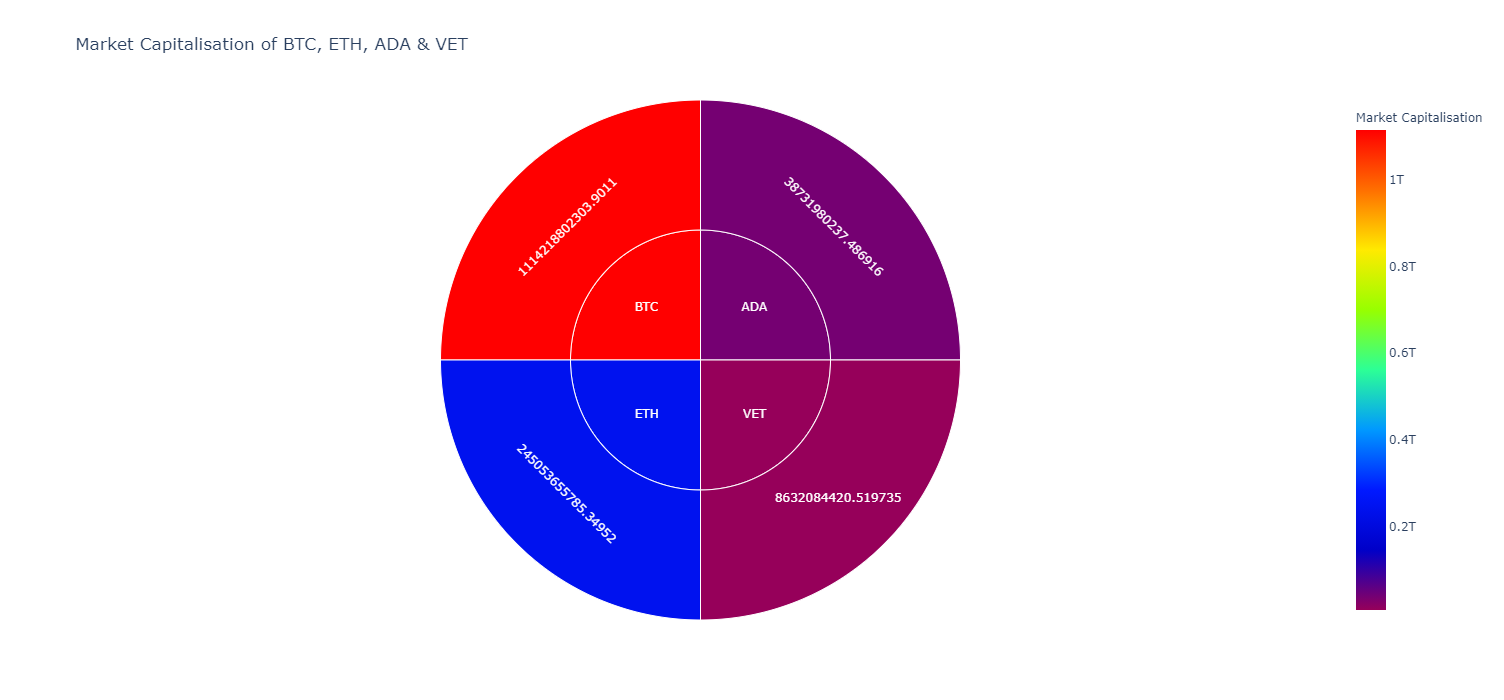

In [328]:
#Creating a sunburst plot of market cap?
import plotly.express as px
fig = px.sunburst(
    crypto_mc,
    path=["Crypto", "Market Capitalisation"],
    color='Market Capitalisation', 
    color_continuous_scale='Rainbow',
    title="Market Capitalisation of BTC, ETH, ADA & VET",
    height=700
)

fig.show()